In [46]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style='darkgrid')

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

In [47]:
cashflow = pd.read_csv('C:\\Users\\MASSIVE\\Downloads\\HACCKATHON\\cashflowStatement_annually.csv')
income = pd.read_csv('C:\\Users\\MASSIVE\\Downloads\\HACCKATHON\\incomeStatementHistory_annually.csv')

# Display the first few rows
print(cashflow.head())
print(income.head())

  stock     endDate  capitalExpenditures  changeToNetincome  \
0   IVC  2019-12-31          -10874000.0         18116000.0   
1   IVC  2018-12-31           -9823000.0         -6092000.0   
2   IVC  2017-12-31          -14569000.0          9498000.0   
3   IVC  2016-12-31          -10151000.0          1247000.0   
4  CSLT  2019-12-31           -1953000.0         20080000.0   

   otherCashflowsFromFinancingActivities  changeToAccountReceivables  \
0                             -1278000.0                   1474000.0   
1                             -1278000.0                   -666000.0   
2                              9389000.0                   2395000.0   
3                              6251000.0                  10210000.0   
4                                    NaN                  -4581000.0   

   changeToInventory  dividendsPaid  otherCashflowsFromInvestingActivities  \
0          6466000.0     -1645000.0                              -813000.0   
1        -11497000.0     -163000

In [48]:
income.isnull().sum()

stock                                    0
endDate                                  0
netIncomeApplicableToCommonShares        2
netIncomeFromContinuingOps               2
totalOtherIncomeExpenseNet               0
costOfRevenue                            0
totalOperatingExpenses                   0
totalRevenue                             0
incomeTaxExpense                         0
interestExpense                       4421
operatingIncome                          0
ebit                                     0
grossProfit                              0
sellingGeneralAdministrative           230
netIncome                                0
incomeBeforeTax                          4
researchDevelopment                  11616
otherOperatingExpenses               12267
minorityInterest                     12062
discontinuedOperations               15969
dtype: int64

In [49]:
# Drop columns with excessive nulls
income_clean = income.drop(columns=['researchDevelopment','stock' ,'otherOperatingExpenses', 'minorityInterest', 'discontinuedOperations'])


In [50]:
# Impute remaining nulls
income_clean['netIncomeApplicableToCommonShares'].fillna(income['netIncomeApplicableToCommonShares'].mean(), inplace=True)
income_clean['netIncomeFromContinuingOps'].fillna(income['netIncomeFromContinuingOps'].mean(), inplace=True)
income_clean['interestExpense'].fillna(income['netIncomeFromContinuingOps'].mean(), inplace=True) 
income_clean['sellingGeneralAdministrative'].fillna(income['sellingGeneralAdministrative'].mean(), inplace=True)
income_clean['incomeBeforeTax'].fillna(income['incomeBeforeTax'].mean(), inplace=True)

income_clean.isnull().sum()

endDate                              0
netIncomeApplicableToCommonShares    0
netIncomeFromContinuingOps           0
totalOtherIncomeExpenseNet           0
costOfRevenue                        0
totalOperatingExpenses               0
totalRevenue                         0
incomeTaxExpense                     0
interestExpense                      0
operatingIncome                      0
ebit                                 0
grossProfit                          0
sellingGeneralAdministrative         0
netIncome                            0
incomeBeforeTax                      0
dtype: int64

In [51]:
income_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
netIncomeApplicableToCommonShares,17511.0,2.915790e+08,1.764925e+09,-2.280900e+10,-14830861.5,12823354.0,1.220010e+08,5.953100e+10
netIncomeFromContinuingOps,17511.0,3.036321e+08,1.796457e+09,-2.108100e+10,-13365049.0,14061000.0,1.273695e+08,5.953100e+10
totalOtherIncomeExpenseNet,17511.0,-1.019447e+08,6.565845e+08,-2.756900e+10,-56164500.0,-6482000.0,0.000000e+00,2.094400e+10
costOfRevenue,17511.0,2.410909e+09,1.215012e+10,-2.240000e+08,4262500.0,131087000.0,9.934970e+08,3.946050e+11
totalOperatingExpenses,17511.0,3.324080e+09,1.515945e+10,-4.657825e+06,50101500.0,310193000.0,1.581470e+09,5.024960e+11
totalRevenue,17511.0,3.818782e+09,1.667710e+10,-4.530280e+08,45438181.0,365196000.0,1.807666e+09,5.239640e+11
incomeTaxExpense,17511.0,8.868748e+07,6.919847e+08,-1.470800e+10,0.0,1329000.0,2.721000e+07,2.938800e+10
interestExpense,17511.0,-6.484392e+05,3.451681e+08,-1.667700e+10,-44242000.0,-4261598.0,3.036321e+08,3.036321e+08
operatingIncome,17511.0,4.947005e+08,2.306389e+09,-8.596000e+09,-4124000.0,34136000.0,2.260690e+08,7.089800e+10
ebit,17511.0,4.252614e+08,2.062433e+09,-8.596000e+09,-3795863.5,15241159.0,1.841810e+08,7.089800e+10


In [52]:
columns_to_drop = [
    'totalOtherIncomeExpenseNet', 
    'interestExpense'
]
df = income_clean.drop(columns=columns_to_drop)

# Step 2: Rename columns to align with backend naming conventions
df = df.rename(columns={
    'netIncome': 'net_profit',
    'totalRevenue': 'revenue',
    'totalOperatingExpenses': 'expenses',
    'costOfRevenue': 'expenses',  # Merge with expenses
    'incomeTaxExpense': 'income_tax',
    'sellingGeneralAdministrative': 'administrative_expense',
    'operatingIncome': 'operating_income',
    'ebit': 'ebit',  # No change, as this is commonly used
    'incomeBeforeTax': 'profit_before_tax'
})

# Step 3: Merge and sum columns where necessary
# Combine all expense-related columns into a single 'expenses' column
df['expenses'] = (
    df[['expenses', 'administrative_expense']]
    .sum(axis=1)
)

# Drop the individual expense columns after merging
df = df.drop(['administrative_expense'], axis=1)

# Step 4: Handle missing values (optional: based on your needs)
df = df.fillna(0)  # Replace NaNs with 0, or use df.dropna() if preferred

# Step 5: Preview the cleaned dataset
print(df.head())

      endDate  netIncomeApplicableToCommonShares  netIncomeFromContinuingOps  \
0  2019-12-31                        -53327000.0                 -53327000.0   
1  2018-12-31                        -43922000.0                 -43922000.0   
2  2017-12-31                        -76541000.0                 -76541000.0   
3  2016-12-31                        -42856000.0                 -42856000.0   
4  2019-12-31                        -40002000.0                 -40002000.0   

       expenses      expenses     revenue  income_tax  operating_income  \
0  1.851760e+09  1.851760e+09   927964000     9302000           2084000   
1  1.973454e+09  1.973454e+09   972347000     9820000         -14380000   
2  1.987968e+09  1.987968e+09   966497000    10291000         -27487000   
3  2.135646e+09  2.135646e+09  1047474000    13299000         -20349000   
4  3.102980e+08  3.102980e+08   143308000           0         -41338000   

       ebit  grossProfit  net_profit  profit_before_tax  
0   208400

In [53]:
df.columns[df.columns.duplicated()]

Index(['expenses'], dtype='object')

In [54]:
df_cleaned = df.loc[:, ~df.columns.duplicated()]

# Display the cleaned DataFrame
print(df_cleaned.head())

      endDate  netIncomeApplicableToCommonShares  netIncomeFromContinuingOps  \
0  2019-12-31                        -53327000.0                 -53327000.0   
1  2018-12-31                        -43922000.0                 -43922000.0   
2  2017-12-31                        -76541000.0                 -76541000.0   
3  2016-12-31                        -42856000.0                 -42856000.0   
4  2019-12-31                        -40002000.0                 -40002000.0   

       expenses     revenue  income_tax  operating_income      ebit  \
0  1.851760e+09   927964000     9302000           2084000   2084000   
1  1.973454e+09   972347000     9820000         -14380000 -14380000   
2  1.987968e+09   966497000    10291000         -27487000 -27487000   
3  2.135646e+09  1047474000    13299000         -20349000 -20349000   
4  3.102980e+08   143308000           0         -41338000 -41338000   

   grossProfit  net_profit  profit_before_tax  
0    262067000   -53327000        -44025000.

In [55]:
copy = df_cleaned.copy()
non_numeric_columns = copy.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)


Index(['endDate'], dtype='object')


In [56]:
copy['endDate'] = pd.to_datetime(copy['endDate'])

# Convert to Unix timestamp in seconds
copy['endDate'] = (copy['endDate'].astype('int64') // 10**9)

In [57]:
columns = list(copy.columns)

<Axes: >

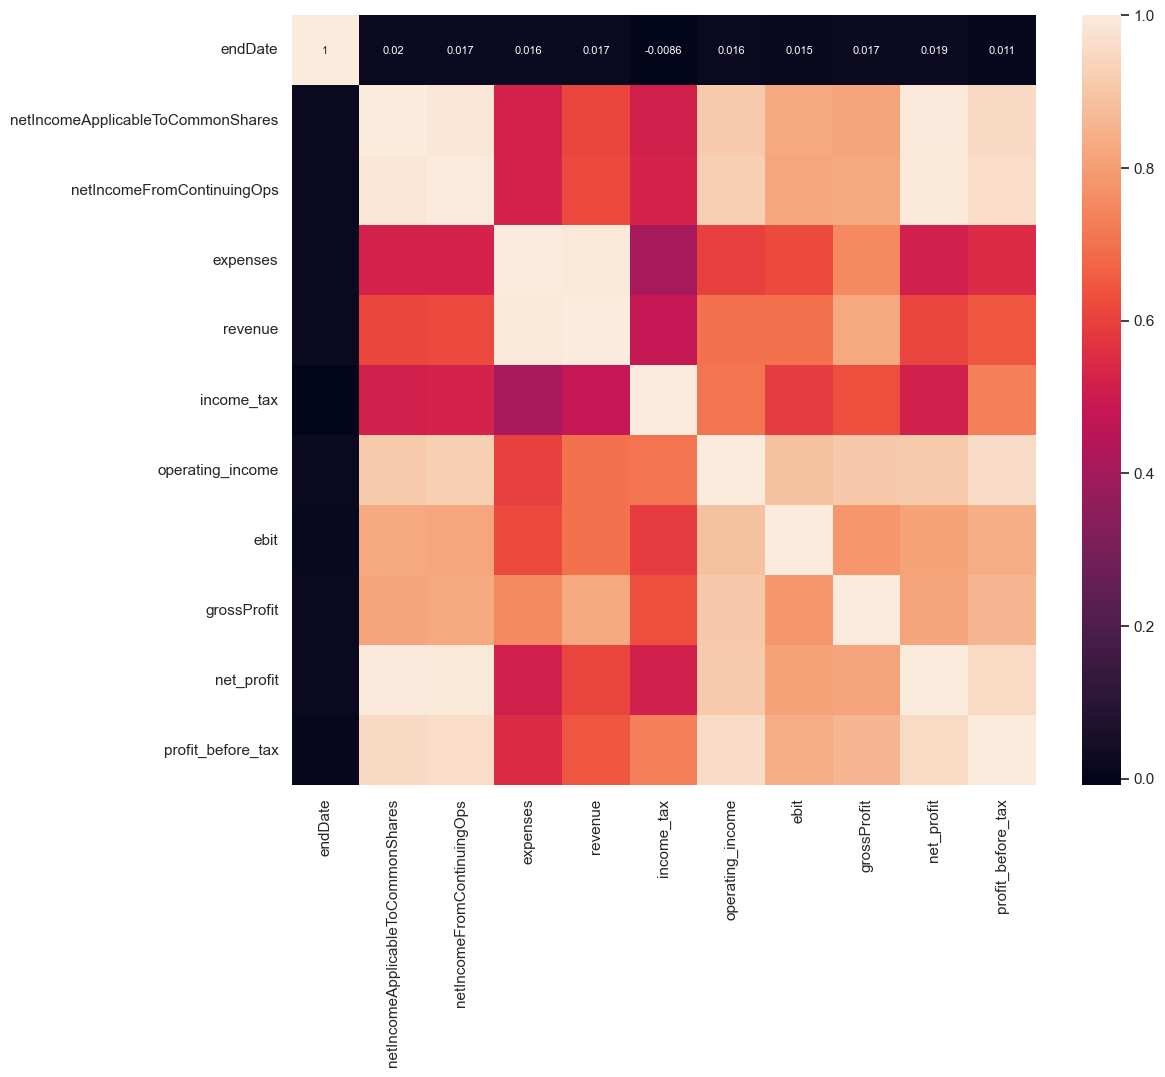

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(copy.corr(), annot=True, annot_kws={'fontsize' : 8})

# this is for NET PROFIT

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Load your dataset
# copy = pd.read_csv('your_data.csv')  # Uncomment this line to load your dataset
#totalOtherIncomeExpenseNet
# Data preprocessing
# Assuming 'netIncome' is the target and the rest are features
X = copy.drop(columns=['net_profit','netIncomeApplicableToCommonShares','netIncomeFromContinuingOps','operating_income'])
y = copy['net_profit']

# Convert categorical features to numeric if needed
#X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R² Score: {r2:.4f}\n")


Linear Regression:
  Mean Absolute Error (MAE): 30177606.02
  Mean Squared Error (MSE): 83151793614055232.00
  R² Score: 0.9647

Decision Tree:
  Mean Absolute Error (MAE): 61378699.70
  Mean Squared Error (MSE): 101792361354023136.00
  R² Score: 0.9568

Random Forest:
  Mean Absolute Error (MAE): 44719221.69
  Mean Squared Error (MSE): 53483041327748496.00
  R² Score: 0.9773

Support Vector Machine:
  Mean Absolute Error (MAE): 342845820.70
  Mean Squared Error (MSE): 2419804266537666048.00
  R² Score: -0.0269

K-Nearest Neighbors:
  Mean Absolute Error (MAE): 90760557.19
  Mean Squared Error (MSE): 181008861373774304.00
  R² Score: 0.9232



In [62]:
X.head()

,endDate,expenses,revenue,income_tax,ebit,grossProfit,profit_before_tax
0,1577750400,1.851760e+09,927964000,9302000,2084000,262067000,-44025000.0
1,1546214400,1.973454e+09,972347000,9820000,-14380000,267676000,-34102000.0
2,1514678400,1.987968e+09,966497000,10291000,-27487000,269251000,-66250000.0
3,1483142400,2.135646e+09,1047474000,13299000,-20349000,283627000,-29557000.0
4,1577750400,3.102980e+08,143308000,0,-41338000,84234000,-40002000.0


In [63]:
import joblib
import os
model_folder = r'C:\Users\MASSIVE\Downloads\HACCKATHON'

# Check if the folder exists, if not, create it (optional, since the folder should already exist)
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Path where the model will be saved
model_path = os.path.join(model_folder, 'linear_regression_model for NET INCOME.pkl')

# Save the best model (Linear Regression) to the specified folder
joblib.dump(models["Linear Regression"], model_path)

print(f"Model saved to {model_path}")


Model saved to C:\Users\MASSIVE\Downloads\HACCKATHON\linear_regression_model for NET INCOME.pkl


# this is for expences

In [64]:


# Load your dataset
# copy = pd.read_csv('your_data.csv')  # Uncomment this line to load your dataset
#totalOtherIncomeExpenseNet
# Data preprocessing
# Assuming 'netIncome' is the target and the rest are features
X = copy.drop(columns=['expenses','netIncomeApplicableToCommonShares','netIncomeFromContinuingOps','operating_income'])
y = copy['expenses']

# Convert categorical features to numeric if needed
#X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R² Score: {r2:.4f}\n")


Linear Regression:
  Mean Absolute Error (MAE): 275892458.86
  Mean Squared Error (MSE): 1213278480394211072.00
  R² Score: 0.9988

Decision Tree:
  Mean Absolute Error (MAE): 539547391.76
  Mean Squared Error (MSE): 68732343525172314112.00
  R² Score: 0.9312

Random Forest:
  Mean Absolute Error (MAE): 370934883.92
  Mean Squared Error (MSE): 15899638896398940160.00
  R² Score: 0.9841

Support Vector Machine:
  Mean Absolute Error (MAE): 6339159472.26
  Mean Squared Error (MSE): 1034359287924776370176.00
  R² Score: -0.0348

K-Nearest Neighbors:
  Mean Absolute Error (MAE): 1100122601.57
  Mean Squared Error (MSE): 45556009619618414592.00
  R² Score: 0.9544



In [65]:
model_folder = r'C:\Users\MASSIVE\Downloads\HACCKATHON'

# Check if the folder exists, if not, create it (optional, since the folder should already exist)
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Path where the model will be saved
model_path = os.path.join(model_folder, 'linear_regression_model for expences.pkl')

# Save the best model (Linear Regression) to the specified folder
joblib.dump(models["Linear Regression"], model_path)

print(f"Model saved to {model_path}")


Model saved to C:\Users\MASSIVE\Downloads\HACCKATHON\linear_regression_model for expences.pkl
